# 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위하여 데이터를 train과 test세트로 나누고 독립변수와 종속변수로 분리하는 작업
- 분석 방법이나 데이터의 양에 따라서 train, validation, test 세트로 분리를 하는 경우도 발생
- 데이터를 분할하는 일반적인 비율
    - Train : Test = 7 : 3 // 8 : 2
        - 가장 일반적으로 데이터를 분할하는 방법
        - 파라미터 수정시에는 Kfold 방식을 이용하여 최적의 파라미터 구성
    - Train : Validation : Test = 6 : 2 : 2
        - 데이터의 양이 굉장히 많은 경우 검증 세트를 생성하여 파라미터 수정
- sklearn의 train_test_split() 함수를 이용하여 데이터를 분할
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = True, stratify = None)
        - X : 독립 변수 데이터
        - Y : 종속 변수 데이터
        - test_size : 테스트 데이터의 비율 (0부터 1사이 값)
        - randon_state : 임의의 데이터를 추출하는 과정에서 seed 값을 지정하면 임의의 데이터를 선택하는 과정이 동일 (seed에 따라 랜덤값에 규칙이 생성)
        - shuffle : True인 경우 데이터를 섞는다. (시계열이 기준인 데이터에서는 False)
        - stratify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 하여 계층화 되어 해당 변수의 비율을 유지하도록 데이터를 분할

In [294]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [295]:
iris_data = load_iris()

In [296]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [297]:
iris = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])

In [298]:
iris['class'] = iris_data['target']

In [299]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [300]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [301]:
iris['class'].map(
    {
        0 : 'setosa',
        1 : 'versicolor',
        2 : 'virginica'
    }
)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [302]:
iris['class'].map(
    lambda x : iris_data['target_names'][x]
    )   

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [303]:
iris.iloc[ :, :-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [304]:
X_train, X_test, Y_train, Y_test = train_test_split(
    # 독립변수 : class 컬럼의 데이터를 제외한 부분
    iris.drop('class', axis = 1),
    # 종속변수 : class 컬럼
    iris['class'],
    # test 데이터의 비율
    test_size = 0.3,
    # random_seed 설정
    random_state = 100
)

In [305]:
# 데이터의 개수를 확인
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"Y_train : {Y_train.shape}, Y_test : {Y_test.shape}")

X_train : (105, 4), X_test : (45, 4)
Y_train : (105,), Y_test : (45,)


In [306]:
Y_train.value_counts()

class
1    39
0    34
2    32
Name: count, dtype: int64

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('class', axis = 1),
    iris['class'],
    test_size = 0.3,
    random_state = 100,
    stratify = iris['class']
)

In [308]:
Y_train.value_counts()

class
1    35
0    35
2    35
Name: count, dtype: int64

# 데이터 스케일링
- 대부분 분석 알고리즘은 컬럼 간 데이터의 범위가 크게 차이나는 경우에는 정상적으로 작동을 하지 않는다. (성능이 떨어진다.)
- 값의 범위가 작은 컬럼에 비해서 범위가 큰 컬럼이 종속변수를 예측하는데 큰 영향을 준다고 판단
- 스케일링 작업은 모든 컬럼의 값의 범위를 같게 만들어주는 작업
- 스케일링 작업 전에 일반적으로 이상치 데이터를 대체하거나 삭제

- 스케일링 순서
    - 데이터 스케일링 하는 경우
        - train, test 나눠져있는 경우 train에서 사용한 scaler를 test에서 사용 (일반적인 사용법)
    1. Scaler 선택 -> 해당 Scaler를 import 
    2. Scaler 객체(class) 생성
    3. train 데이터의 분포를 저장
    4. train 데이터 스케일링
    5. test 데이터 스케일링
    6. 원본 데이터로 변환

### Standard Scaler
- 표준화 방식으로 가장 기본적인 스케일러
- 평균이 0, 분산이 1인 정규분포로 스케일링
- 최솟값과 최대값의 크기를 따로 제한하지 않아 이상치에 민감하기 때문에 이상치에 대한 확인 및 정제를 한 뒤 사용
- 일반적으로 회귀보다는 분류 분석에서 사용

In [309]:
# 스케일러를 선택하고 import
from sklearn.preprocessing import StandardScaler

In [310]:
# Scaler Class 생성
StdScaler = StandardScaler()

In [311]:
# train 데이터의 분포를 저장
StdScaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [312]:
# train 데이터를 스케일링
X_train_sc = StdScaler.transform(X_train)

In [313]:
# test 데이터를 스케일링
X_test_sc = StdScaler.transform(X_test)

In [314]:
print(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std())
print(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std())

-2.136839518936813 2.746036422050459 -2.1992989440193578e-16 0.9999999999999999
-2.6251271130355405 3.234324016149187 -0.07966987272711866 1.030475412446363


In [315]:
def scaler_print(train, test):
    print(
        f"""Train Scaled : 
                    {round(train.min(), 2)}
                    {round(train.max(), 2)}
                    {round(train.mean(), 2)}
                    {round(train.std(), 2)}
        """
    )
    print(
        f"""Test Scaled : 
                    {round(test.min(), 2)}
                    {round(test.max(), 2)}
                    {round(test.mean(), 2)}
                    {round(test.std(), 2)}
        """
    )

In [316]:
scaler_print(X_train_sc, X_test_sc)

Train Scaled : 
                    -2.14
                    2.75
                    -0.0
                    1.0
        
Test Scaled : 
                    -2.63
                    3.23
                    -0.08
                    1.03
        


### Min-Max Scaler
- 정규화 방식으로 컬럼의 데이터들을 0과 1 사이의 값으로 스케일링하는 방식
- 최솟값 0 최댓값 1 
- 이상치에 매우 민감하므로 이상치에 대한 확인 정제 필수
- 일반적으로 분류보다 회귀에서 사용

In [317]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)
X_test_sc = MmScaler.transform(X_test)

scaler_print(X_train_sc, X_test_sc)

Train Scaled : 
                    0.0
                    1.0
                    0.45
                    0.27
        
Test Scaled : 
                    -0.1
                    1.1
                    0.43
                    0.27
        


### Max Abs Scaler
- 최대절댓값과 0이 각각 1, 0이 되도록 스케일링을 하는 정규화 방식으로 모든 값은 -1부터 1 사이로 표현
- 스케일링 대상의 데이터가 모두 양수인 경우라면 MinMaxScaler와 동일
- 이상치에 매우 민감. 정제작업 필요
- 일반적으로 분류보다는 회귀에서 사용

In [318]:
from sklearn.preprocessing import MaxAbsScaler

In [319]:
MaScaler = MaxAbsScaler()

In [320]:
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)
X_test_sc = MaScaler.transform(X_test)

scaler_print(X_train_sc, X_test_sc)

Train Scaled : 
                    0.04
                    1.0
                    0.63
                    0.24
        
Test Scaled : 
                    0.08
                    1.05
                    0.61
                    0.24
        


### Robust Scaler
- 평균과 분산을 사용하는 Standard 대신에 중앙값과 사분위수를 확용하는 방식
- 중앙값을 0으로 설정 IQR을 사용하여 이상치의 영향을 최소화
- quantile_range 매개변수(기본값이 [0.25, 0.75])의 값을 조절하여 더 좁은 범위의 값을 이상치로 판단하여 정제할 수 있다.

In [321]:
from sklearn.preprocessing import RobustScaler

In [322]:
# RuScaler = RobustScaler(quantile_range = (0.2, 0.8))
RuScaler = RobustScaler()

In [323]:
RuScaler.fit(X_train)

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


In [324]:
X_train_sc = RuScaler.transform(X_train)
X_test_sc = RuScaler.transform(X_test)

In [325]:
scaler_print(X_train_sc, X_test_sc)

Train Scaled : 
                    -1.33
                    2.0
                    -0.03
                    0.6
        
Test Scaled : 
                    -1.67
                    2.33
                    -0.08
                    0.62
        


In [326]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3
0,0.230769,-0.333333,-0.111111,-0.066667
1,-0.230769,-0.666667,0.000000,-0.133333
2,-0.615385,1.000000,-0.833333,-0.800000
3,-0.538462,0.833333,-0.833333,-0.733333
4,-0.076923,1.333333,-0.750000,-0.733333


In [327]:
# 스케일링 데이터를 원본의 데이터로 변환
X_origin = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_origin).head()

,0,1,2,3
0,6.1,2.8,4.0,1.3
1,5.5,2.6,4.4,1.2
2,5.0,3.6,1.4,0.2
3,5.1,3.5,1.4,0.3
4,5.7,3.8,1.7,0.3


# 회귀분석
- 회귀 분석은 실제값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능 평가 지표
- 실제값과 예측값의 차이를 구해서 이것들을 단순 합산을 하면 양수와 음수가 섞여있기 때문에 문제 발생

### MAE
    - 실제값과 예측값의 차이를 절댓값으로 변환하고 평균을 구한 값
    - 에러의 크기가 그대로 반영
    - 이상치의 영향 받는다

### MSE
    - 실제값과 예측값의 차이를 제곱한 값의 평균을 구한 값
    - 실제값과 예측값의 면적 합을 의미
    - 이상치의 영향 받는다

### RMSE
    - MSE의 값에 루트를 씌운 값
    - 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
    - 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MSLE
    - 실제값과 예측값의 차이를 제곱해 평균을 한 값에 로그를 적용한 값
    - RMSE와 같이 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MAPE
    - MAE를 퍼센트로 표기
    - 오차가 예측값에서 차지하는 정도를 나타냄

- 회귀분석의 순서
1. 모델 선택
2. 모델 객채(class)를 생성
3. 모델을 학습 (독립 변수 + 종속 변수)
4. 데이터(독립 변수)를 주고 예측
5. 실제 값과 예측 값을 확인하고 오차를 체크

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
boston = pd.read_csv('../data_git/csv/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [330]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- boston 데이터에서 컬럼
    - CRIM: 범죄율(해당 지역 1인당 범죄 발생 수)
    - ZN: 25,000 평방피트 이상 주거지역 비율
    - INDUS: 비상업 지역(상업지구 아닌 지역) 토지 비율
    - CHAS: 찰스강 경계 여부(1: 경계, 0: 비경계)
    - NOX: 일산화질소 농도 (10ppm 단위)
    - RM: 주택 1가구당 평균 방 개수
    - AGE: 1940년 이전에 지어진 주택 비율
    - DIS: 작업 중심지(보스턴 5군데)까지의 가중 거리
    - RAD: 방사형 고속도로 접근성 지수
    - TAX: $10,000 당 제산세율
    - PTRATTO: 지역별 학생-교사 비율
    - B: 인종 지수(흑인 거주 비율)
    - LSTAT: 저소득층 비율(%)
    - Price: 주택의 가격의 중앙값

In [331]:
cols = boston.columns.difference(['CHAS', 'Price'])

In [332]:
# boston_graph = boston.drop(['Price', 'CHAS'], axis = 1)

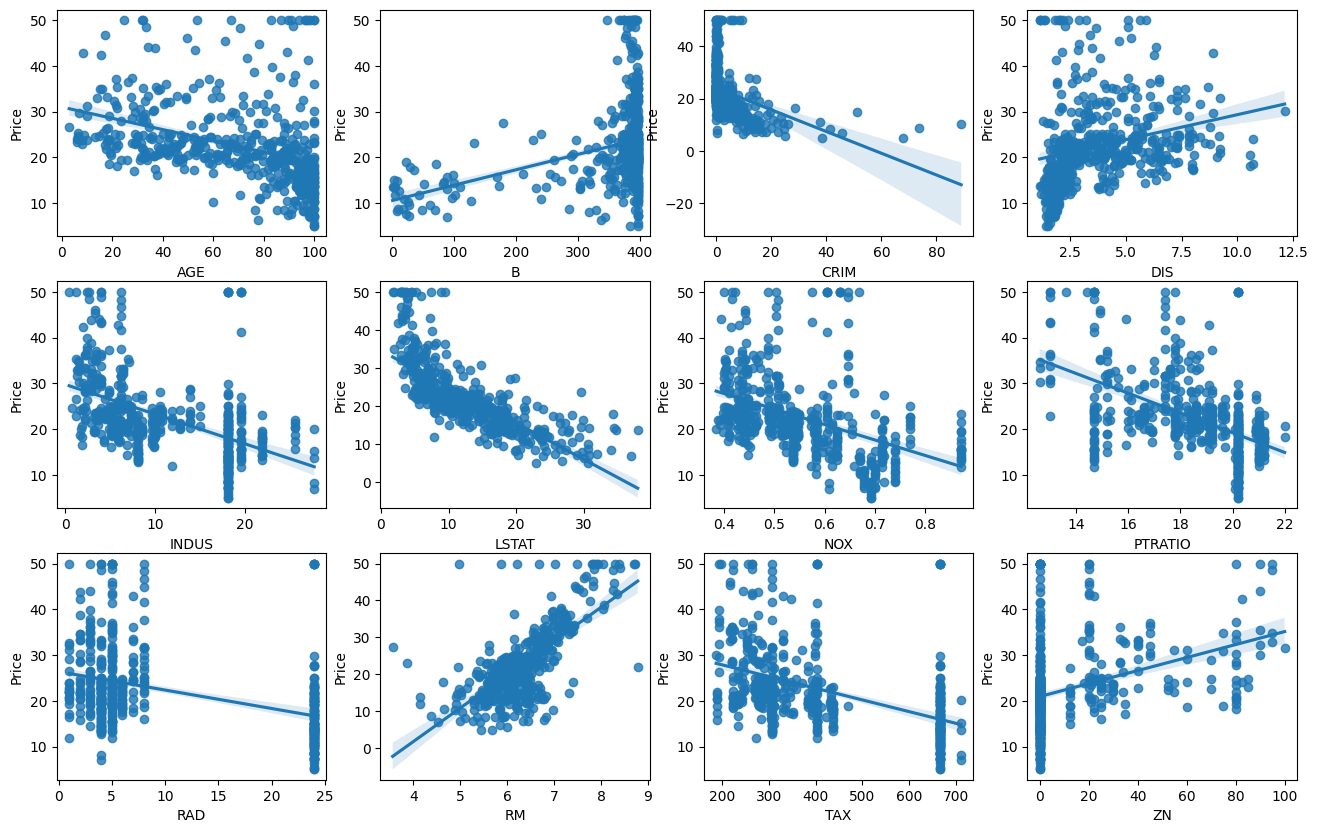

In [333]:
# subplot을 이용하여 Price와 CHAS 컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16,10))

# cols를 기준으로 반복문 실행
for i in range(len(cols)):
    sns.regplot(x = cols[i], y = boston['Price'], data = boston, ax = axes.flat[i])
        
plt.show()

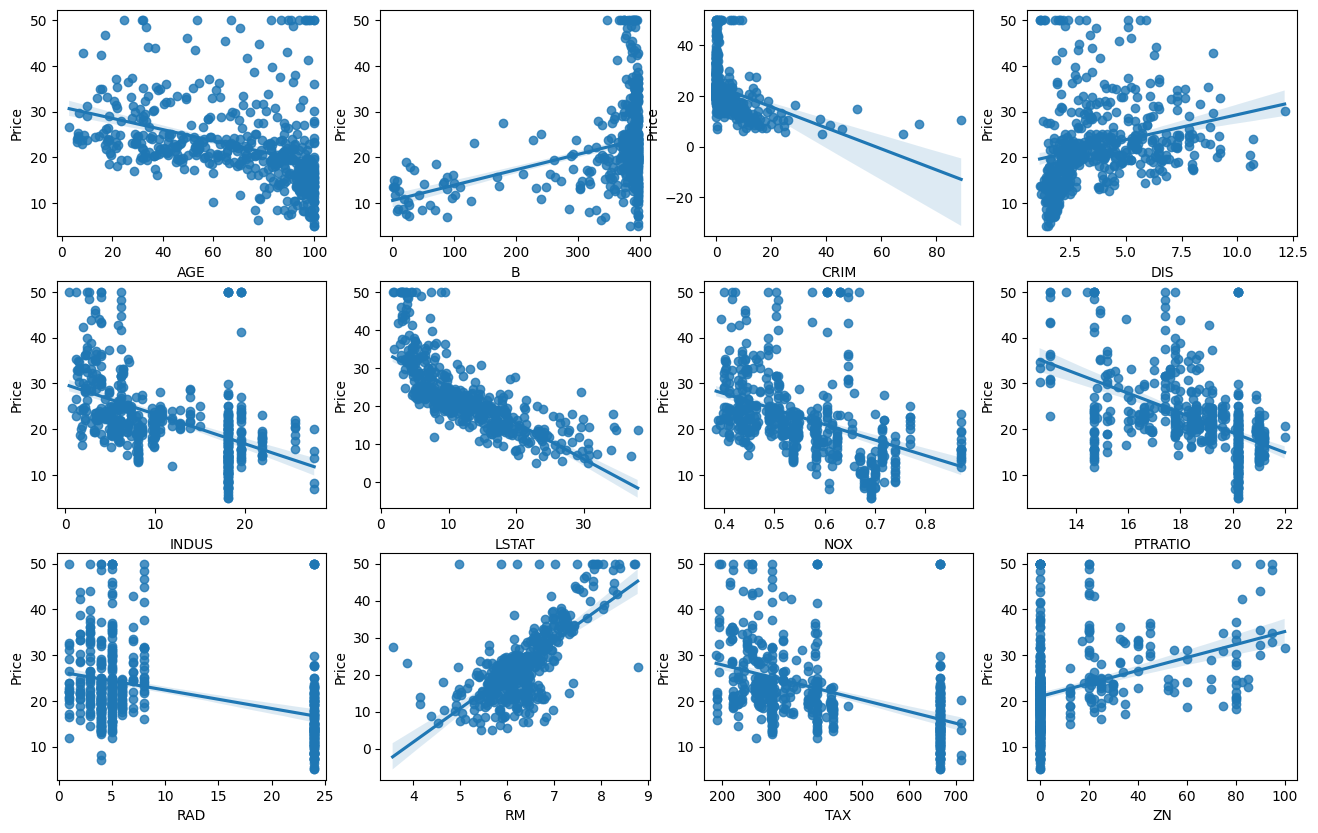

In [334]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16,10))

# cols를 기준으로 반복문 실행
for i, column in zip(range(len(cols)), cols):
    # row = i//4
    row = int(i/4)
    col = i % 4
    sns.regplot(x = column, y = boston['Price'], data = boston, ax = axes[row][col])
        
plt.show()

In [335]:
# 모든 컬럼을 기준으로 train, test 데이터셋으로 데이터 분할
# 독립 변수는 주택의 가격을 제외한 나머지 컬럼들
X = boston.drop('Price', axis = 1).values
Y = boston['Price'].values
type(X) # array

numpy.ndarray

In [336]:
boston['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [337]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 100
)

In [338]:
# 종속변수의 학습데이터와 평가 데이터의 평균을 확인
print(Y_train.mean())
print(Y_test.mean())

22.621039603960394
22.18333333333333


In [339]:
# 모델의 선택
from sklearn.linear_model import LinearRegression

In [340]:
# class(객체)를 생성
lr = LinearRegression()

In [341]:
# 모델에 학습 -> X_train, Y_train
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [342]:
# 예측 -> 독립변수 중 평가 데이터로 구성된 X_test 데이터를 대입
pred = lr.predict(X_test)

In [343]:
Y_test

array([34.6, 31.5, 20.6, 14.5, 16.2, 22.3, 22.8, 24.4, 19.8, 16.7, 23.2,
       15.1, 21. , 18.9, 48.5, 24.1, 22.5, 16.1, 30.3, 50. , 33.8, 10.4,
       20.4, 14.2, 10.5, 12.7, 24.5, 16.7, 20.1, 17.1, 18.4, 24.3, 50. ,
       23.8, 30.7, 33.4, 15. , 10.9, 19.1, 21. , 22.9, 22.4, 19. , 19.3,
       27. , 27.1, 19.1, 15.4, 19.1, 13.5, 20.9, 19.3, 20.5, 26.2, 12. ,
       19.7, 29.6, 34.9,  8.3, 21.2, 14.5, 27.5, 19.4, 32.7, 21.1, 28.1,
       17.4, 30.1, 21.4, 20.9, 10.9, 21.7,  8.8, 15.2, 26.6,  8.7, 24.7,
       38.7,  6.3, 22.6, 43.8, 50. , 14.5, 11.7, 12.5, 13.6, 21.5, 19.1,
        9.5, 17.2, 29.8, 22.6, 21.6, 22.2, 27.1, 17. , 22. , 50. ,  7.2,
       50. , 14. , 11. ])

In [344]:
pred_df = pd.DataFrame(pred, columns = ['Pred price'])
actual_df = pd.DataFrame(Y_test, columns = ['Actual price'])
test_df = pd.DataFrame(X_test, columns = boston.columns.difference(['Price']))

In [345]:
actual_df

,Actual price
0,34.6
1,31.5
2,20.6
3,14.5
4,16.2
...,...
97,50.0
98,7.2
99,50.0
100,14.0


In [346]:
pd.concat([test_df, pred_df, actual_df], axis = 1)

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,Pred price,Actual price
0,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.408110,34.6
1,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.185246,31.5
2,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,22.312861,20.6
3,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,17.886139,14.5
4,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,20.435721,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,36.185086,50.0
98,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,18.010970,7.2
99,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,23.182265,50.0
100,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,13.772710,14.0


In [347]:
# 평가 지표 생성
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, \
mean_absolute_percentage_error

In [348]:
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
msle = mean_squared_log_error(Y_test, pred)
mape = mean_absolute_percentage_error(Y_test, pred)
rmse = np.sqrt(mse)

In [349]:
print("MAE : ", round(mae, 2))
print("MSE : ", round(mse, 2))
print("MSLE : ", round(msle, 2))
print("MAPE : ", round(mape, 2))
print("RMSE : ", round(rmse, 2))

MAE :  3.25
MSE :  23.62
MSLE :  0.05
MAPE :  0.17
RMSE :  4.86


In [350]:
from sklearn.metrics import r2_score

# 결정 계수 출력
r2 = r2_score( Y_test, pred )

print("R2 Score : ", round(r2, 2))

R2 Score :  0.76


In [351]:
# R2-Score의 문제: 컬럼(피쳐)의 개수가 많아지면 R2-Score가 증가하는 경향
# 수정된 R2-Score 생성
# 1 - ( (1 - r2)*(n - 1) / (n - p - 1))
# X_test index의 수
n = X_test.shape[0]
# X_test 컬럼의 수
p = X_test.shape[1]

adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1))
print('Adj R2 Score ; ', round(adj_r2, 2))

Adj R2 Score ;  0.72


In [352]:
# 회귀계수 출력
print(lr.coef_)

[-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


In [353]:
pd.Series(lr.coef_, index = boston.columns.difference(['Price']))

AGE        -0.081490
B           0.048041
CHAS       -0.005472
CRIM        3.062606
DIS       -16.136881
INDUS       3.672451
LSTAT      -0.008515
NOX        -1.517409
PTRATIO     0.287271
RAD        -0.012121
RM         -0.924161
TAX         0.009535
ZN         -0.485896
dtype: float64

- 연습
1. boston 데이터에서 B, CHAS, LSTAT, TAX 컬럼을 제외하고 학습 모델을 생성
2. 독립변수는 Price 를 제외한 나머지 데이터
3. 종속변수는 Price 데이터
4. train, test 데이터를 7:3의 비율로 나눠준다.(random_state는 42 고정)
5. Scaler를 이용하여 train data를 스케일링 (MinMaxScaler)
6. LinearRegression 모델을 이용하여 학습, 예측
7. 실제값과 예측값의 평가 지표를 mae, mse, msle, r2, adj_r2 출력

In [371]:
boston_new = boston.drop(['B', 'CHAS', 'LSTAT', 'TAX' ], axis = 1)

In [372]:
boston_new

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,21.0,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,21.0,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,21.0,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,21.0,22.0


In [373]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston_new.iloc[: , :-1],
    boston_new['Price'],
    test_size = 0.3,
    random_state = 42
    )

In [374]:
# 종속변수의 학습데이터와 평가 데이터의 평균을 확인
print(Y_train.mean())
print(Y_test.mean())

23.01581920903955
21.407894736842106


In [375]:
print(X_train.shape)
print(X_test.shape)

(354, 9)
(152, 9)


In [376]:
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)
X_test_sc = MmScaler.transform(X_test)

In [377]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [378]:
lr.fit(X_train_sc, Y_train)
pred = lr.predict(X_test_sc)

In [379]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Price, Length: 152, dtype: float64

In [380]:
pred_df = pd.DataFrame(pred, columns = ['Pred Price'])
actual_df = pd.DataFrame(Y_test, columns = ['Actual price'])
test_df = pd.DataFrame(X_test, columns = boston_new.columns.difference(['Price']))

In [381]:
pd.concat([test_df, pred_df, actual_df], axis = 1)

,AGE,CRIM,DIS,INDUS,NOX,PTRATIO,RAD,RM,ZN,Pred Price,Actual price
173,84.1,0.09178,2.6463,4.05,0.510,16.6,5.0,6.416,0.0,NaN,NaN
274,32.9,0.05644,4.0776,6.41,0.447,17.6,4.0,6.758,40.0,NaN,NaN
491,98.8,0.10574,1.8681,27.74,0.609,20.1,4.0,5.983,0.0,NaN,NaN
72,7.8,0.09164,5.2873,10.81,0.413,19.2,4.0,6.065,0.0,13.656908,NaN
452,91.8,5.09017,2.3682,18.10,0.713,20.2,24.0,6.297,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.615590,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.703224,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.427027,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.445711,NaN


In [382]:
actual_df

,Actual price


In [383]:
pd.concat([test_df, pred_df, actual_df])

,AGE,CRIM,DIS,INDUS,NOX,PTRATIO,RAD,RM,ZN,Pred Price,Actual price
173,84.1,0.09178,2.6463,4.05,0.510,16.6,5.0,6.416,0.0,NaN,NaN
274,32.9,0.05644,4.0776,6.41,0.447,17.6,4.0,6.758,40.0,NaN,NaN
491,98.8,0.10574,1.8681,27.74,0.609,20.1,4.0,5.983,0.0,NaN,NaN
72,7.8,0.09164,5.2873,10.81,0.413,19.2,4.0,6.065,0.0,NaN,NaN
452,91.8,5.09017,2.3682,18.10,0.713,20.2,24.0,6.297,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.703224,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.049092,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.427027,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.445711,NaN


In [384]:
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
msle = mean_squared_log_error(Y_test, pred)
r2 = r2_score(Y_test, pred)
# X_test index의 수
n = X_test.shape[0]
# X_test 컬럼의 수
p = X_test.shape[1]
adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1))

In [385]:
print("MAE : ", round(mae, 2))
print("MSE : ", round(mse, 2))
print("MSLE : ", round(msle, 2))
print("R2 Score : ", round(r2, 2))
print('Adj R2 Score ; ', round(adj_r2, 2))

MAE :  3.29
MSE :  24.66
MSLE :  0.15
R2 Score :  0.67
Adj R2 Score ;  0.65


In [386]:
boston.corr(method = 'pearson')['Price'].abs().sort_values(ascending = False)

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64